<a href="https://colab.research.google.com/github/adam2504/adam2504/blob/main/test1_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib
Shape of the image (87102,)


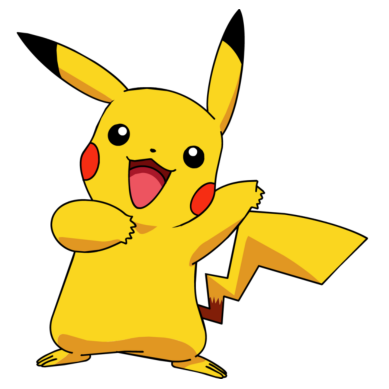

Shape of the image (568976,)


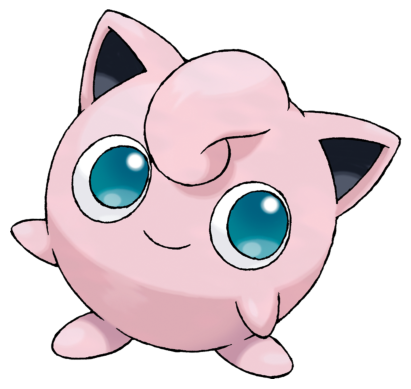

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_pikachu = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/pikachu.png?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_rondoudou = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/rondoudou.png?raw=true'
resp = requests.get(url_rondoudou, stream=True).raw
image_array_rondoudou = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_rondoudou.shape}')
image_rondoudou = cv2.imdecode(image_array_rondoudou, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  000  255  255  255  255  255  255  255  255  255  255  

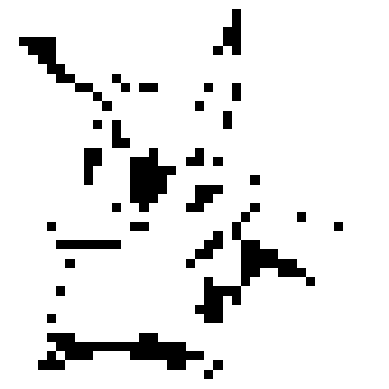

In [ ]:
res = cv2.resize(image_pikachu , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
#
#

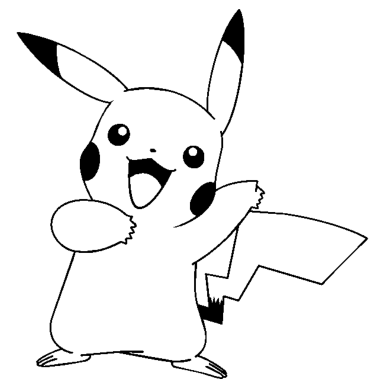

In [ ]:
#Convert to bw
img_bw = cv2.imdecode(image_array_pikachu, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


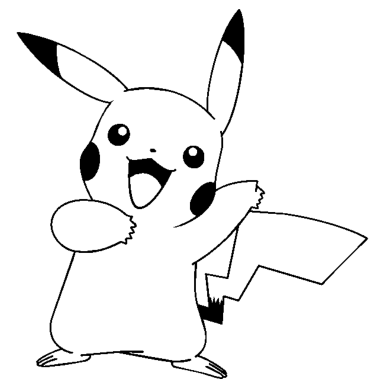

In [ ]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


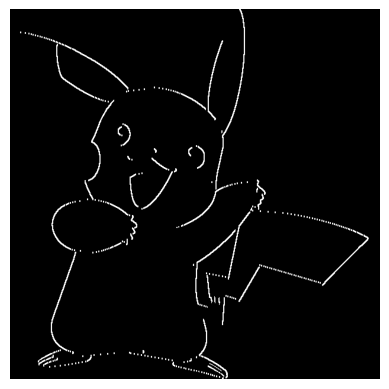

In [ ]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


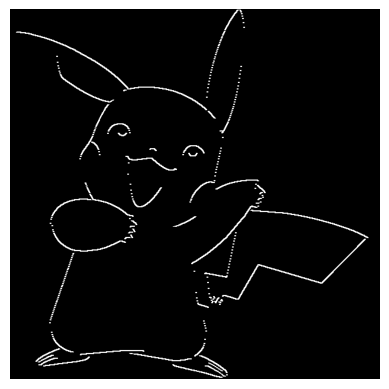

In [ ]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [ ]:
#example
from scipy.ndimage import convolve
m = [[10, 10, 1],[10, 1, 1],[-10, 1, 1]]
k = [[10, 10, 10],[0, 0, 0],[-10, -10, -10]]

c= convolve(m, k , mode='constant', cval=0.0)
print('Matrix')
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
      for row in m]))

print('Kernel')
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
      for row in k]))

print('Convolution')
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
      for row in c]))

Matrix
  10  10   1
  10   1   1
 -10   1   1
Kernel
  10  10  10
   0   0   0
 -10 -10 -10
Convolution
 110 120  20
-290-290 -90
-110-120 -20


(3, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

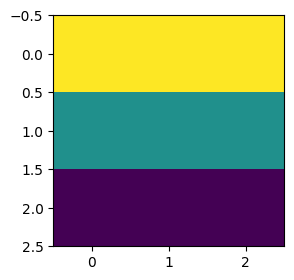

In [ ]:
k2 = np.matrix(k)
f_min, f_max = k2.min(), k2.max()
filter = (k2 - f_min) / (f_max - f_min)
print(k2.shape)
fig= plt.figure(figsize=(3,3))
plt.imshow(k2)
plt.show

In [10]:
# Import dataset
import pathlib
import os
import zipfile
import tensorflow as tf

# Télécharger les datasets
pear_data_dir = tf.keras.utils.get_file(
    "pear.zip",
    "https://github.com/Else-If-05/Pomme_ou_Poire/raw/main/datasets/pear.zip",
    extract=False
)

apple_data_dir = tf.keras.utils.get_file(
    "apple.zip",
    "https://github.com/Else-If-05/Pomme_ou_Poire/raw/main/datasets/apple.zip",
    extract=False
)

# Créer le dossier datasets s'il n'existe pas
os.makedirs('/content/datasets', exist_ok=True)

# Dézipper les datasets dans le dossier /content/datasets
with zipfile.ZipFile(pear_data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
with zipfile.ZipFile(apple_data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

# Pointer vers le bon répertoire (à ajuster si le zip crée des sous-dossiers)
data_dir = pathlib.Path('/content/datasets')
print(data_dir)
print(os.path.abspath(data_dir))


5485097/5485097 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
/content/datasets
/content/datasets


In [12]:
data_dir = pathlib.Path('/content/datasets')
image_extensions = ['*.jpg', '*.jpeg', '*.png']

image_count = 0
for ext in image_extensions:
    image_count += len(list(data_dir.rglob(ext)))

print(f"Nombre total d'images : {image_count}")

pear_data_dir = pathlib.Path('/content/datasets/pear')

pear_image_count = 0
for ext in image_extensions:
    image_count += len(list(pear_data_dir.rglob(ext)))

print(f"Nombre total d'images de poires : {pear_image_count}")

apple_data_dir = pathlib.Path('/content/datasets/Apple')

apple_image_count = 0
for ext in image_extensions:
    image_count += len(list(apple_data_dir.rglob(ext)))

print(f"Nombre total d'images de pommes : {apple_image_count}")


Nombre total d'images : 5951


AttributeError: 'str' object has no attribute 'rglob'